In [2]:
import numpy as np
import control
import scipy.signal

# Mass Spring Damper Example

In [3]:
M = np.array([
    [2, 1],
    [1, 1]
])
Phi = np.array([
    [1, 0],
    [0, 0]
])
K = np.array([
    [2, 1],
    [1, 2]
])

$M \ddot{\vec{q}} + \Phi \dot{\vec{q}} + K \vec{q} = B \vec{u}$

**Question: is this system stable? Does the stability depend on the the B matrix?**

In [4]:
np.linalg.eig(M)[0], np.linalg.eig(Phi)[0], np.linalg.eig(K)[0]

(array([2.61803399, 0.38196601]), array([1., 0.]), array([3., 1.]))

In [5]:
MI = np.linalg.inv(M)
A = np.block([
    [np.zeros((2, 2)), np.eye(2)],
    [-MI.dot(K), -MI.dot(Phi)]
])
B = np.array([[0, 0, 0, 1]]).T
B
#np.real(np.linalg.eig(A)[0])
C = np.eye(4)
D = np.zeros((4, 1))

In [6]:
ss = control.ss(A, B, C, D)
ss

StateSpace(array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  1., -1., -0.],
       [-0., -3.,  1., -0.]]), array([[0.],
       [0.],
       [0.],
       [1.]]), array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), array([[0.],
       [0.],
       [0.],
       [0.]]))

In [7]:
np.linalg.eig(A)[0]

array([-0.29177671+1.03257971j, -0.29177671-1.03257971j,
       -0.20822329+1.60070913j, -0.20822329-1.60070913j])

In [8]:
G = control.tf([1, 2], [1, 2, 3])

In [9]:
ss_G = control.tf2ss(G)
ss_G.A, ss_G.B, ss_G.C, ss_G.D

(matrix([[-2.00000000e+00,  3.00000000e+00],
         [-1.00000000e+00, -1.11022302e-16]]),
 matrix([[1.],
         [0.]]),
 matrix([[ 1., -2.]]),
 matrix([[0.]]))

In [10]:
G = control.ss2tf(ss)
G

TransferFunction([[array([1.])], [array([1., 1., 1.])], [array([1., 0.])], [array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -5.55111512e-17])]], [[array([1., 1., 4., 2., 3.])], [array([1., 1., 4., 2., 3.])], [array([1., 1., 4., 2., 3.])], [array([1., 1., 4., 2., 3.])]])

In [11]:
G00 = G[0, 0]
G00

TransferFunction(array([1.]), array([1., 1., 4., 2., 3.]))

Final value:
to a unit step
lim s-> 0 s*G(s)


In [12]:
20*np.log10(G00(0))

(-9.54242509439325+0j)

In [13]:
1/10**(-75/20)

5623.413251903491

In [14]:
20*np.log10(G[0, 0](0))

(-9.54242509439325+0j)

In [15]:
G[0, 0]

TransferFunction(array([1.]), array([1., 1., 4., 2., 3.]))

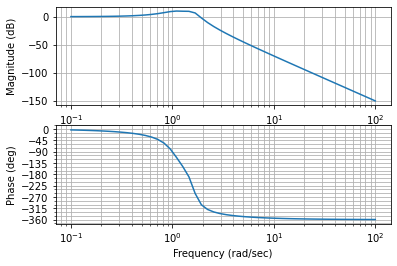

In [16]:
control.bode(3*G[0, 0], dB=True);

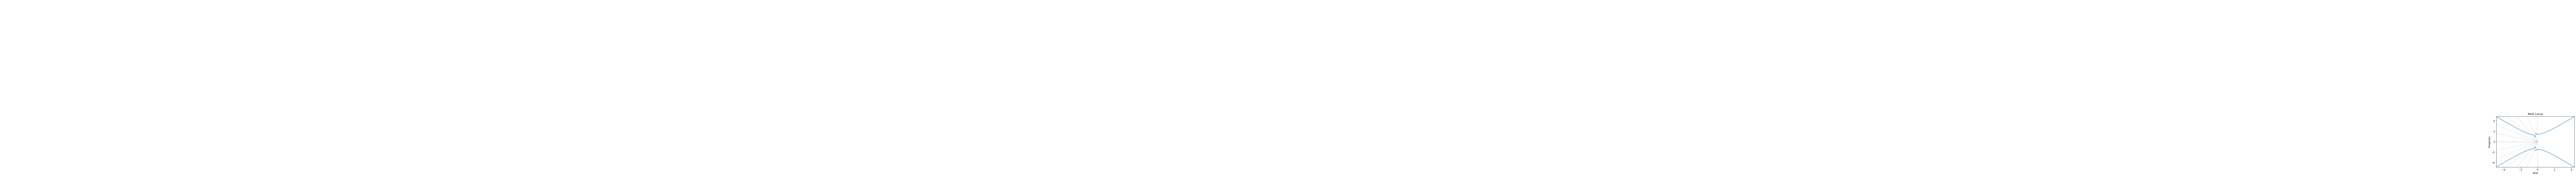

In [17]:
control.rlocus(G[0, 0]);

In [18]:
G

TransferFunction([[array([1.])], [array([1., 1., 1.])], [array([1., 0.])], [array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -5.55111512e-17])]], [[array([1., 1., 4., 2., 3.])], [array([1., 1., 4., 2., 3.])], [array([1., 1., 4., 2., 3.])], [array([1., 1., 4., 2., 3.])]])

In [19]:
G[0, 0]

TransferFunction(array([1.]), array([1., 1., 4., 2., 3.]))

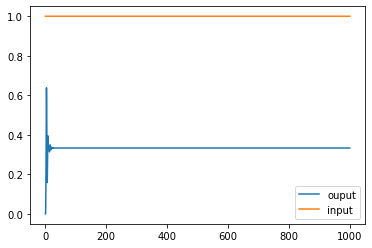

In [20]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1000, 10000)
u = 1*np.ones(len(t)) #np.sin(0.01*t)
t, y, x = control.forced_response(G[0, 0], T=t, U=u)
plt.plot(t, y, label='ouput')
plt.plot(t, u, label='input')
plt.legend()

## Steady State Response

If $u(t) = e^{i\omega t}$, then:

$y_{ss}(t)=|G(i\omega)|e^{i(\omega t + \phi(i\omega))}$


We can use the above to evaluate the case for $u(t) = \cos(t) = \dfrac{e^{it} + e^{-it}}{2}$.

If $\boxed{u(t) = \gamma \cos(\omega t + \psi)}$, then:

$\boxed{y_{ss}(t) = \gamma |G(i\omega)|\cos(\omega t + \psi + \phi(i\omega))}$

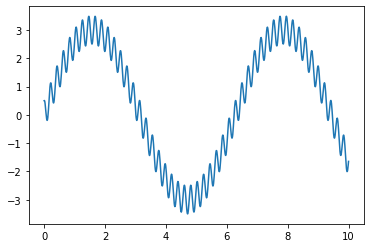

In [21]:
t = np.linspace(0, 10, 1000)
u = 3*np.sin(1*t) + 0.5*np.cos(30*t)
import matplotlib.pyplot as plt
plt.plot(t, u)

In [22]:
s = control.tf([1, 0], [1])
s

TransferFunction(array([1, 0]), array([1]))

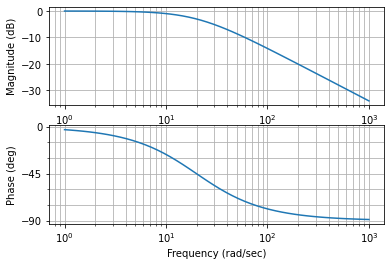

In [23]:
control.bode(20/(s + 20), dB=True);

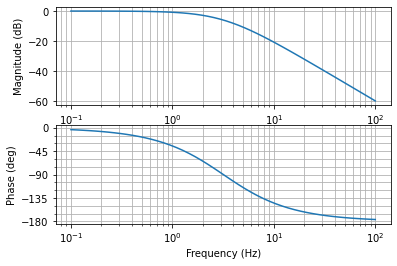

In [24]:
control.bode((20/(s + 20))**2, dB=True, Hz=True);

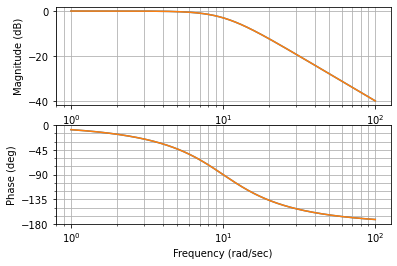

In [25]:
zeta = np.sqrt(2)/2
wn = 10
s = control.tf([1, 0], [0, 1])
G = wn**2/(s**2 + 2*zeta*wn*s + wn**2)
G_butter = control.tf(*scipy.signal.butter(2, 10, analog='True'))
control.bode([G, G_butter], dB=True, omega=np.logspace(0, 2, 1000));

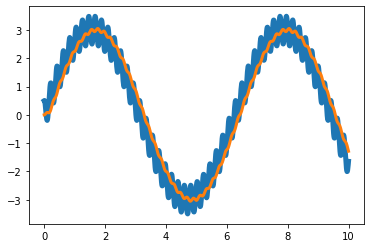

In [26]:
t, y, x = control.forced_response(G, T=t, U=u)
plt.plot(t, u, linewidth=5)
plt.plot(t, y, linewidth=3)

In [27]:
s = control.tf([1, 0], [0, 1])
G = 10/(s+10)
t, y, x = control.forced_response(G, T=t, U=u)

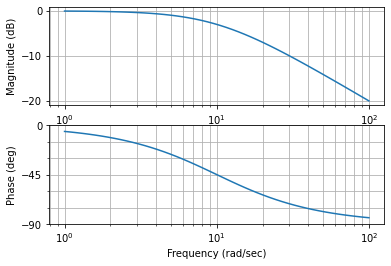

In [28]:
control.bode(G, dB=True);

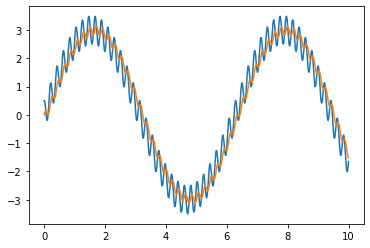

In [29]:
plt.plot(t, u)
plt.plot(t, y)

## Choosing Filters

* Ideal vs. Non-Ideal Filters
* Band-pass, Band-stop, Low-pass, high-pass
* Elliptical/ Butter

## Butterworth and Elliptical Filters

### Elliptical

* Sharp attenuation
* Flat attenuation at high frequencies
* Pass band ripple

### Butterworth

* Steady attenuation
* Infinite attenuation at infinite frequency
* Maximally flat in pass-band

In [30]:
import scipy.signal

s = control.tf([1, 0], [0 ,1])
G_ellip = control.tf(*scipy.signal.ellip(N=2, rp=1, rs=20, Wn=15, analog='True'))
G_butter = control.tf(*scipy.signal.butter(N=2, Wn=15, analog='True'))

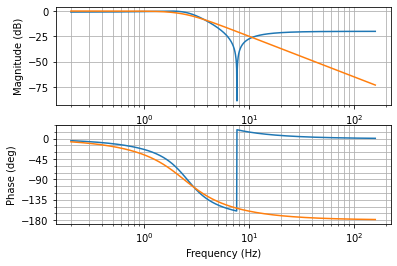

In [31]:
control.bode([G_ellip, G_butter], omega= np.logspace(0.1, 3, 1000),
             dB=True, Hz=True);

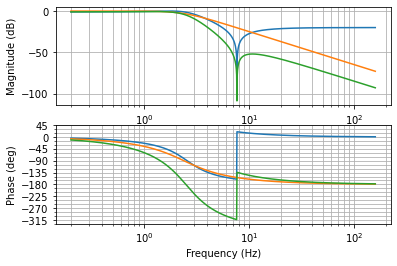

In [32]:
control.bode([G_ellip, G_butter, G_ellip*G_butter], omega= np.logspace(0.1, 3, 1000),
             dB=True, Hz=True);

The second order butter filter is a second order system with the cutoff frequency at $\omega_n$, and a damping ratio of $\sqrt{2}/2$. We design most control systems to respond similarly to a second order butter filter.

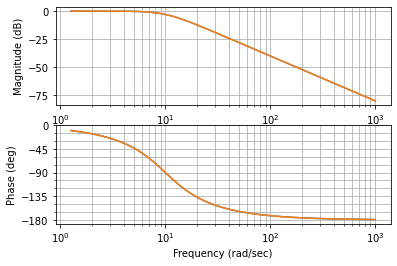

In [33]:
G_butter = control.tf(*scipy.signal.butter(2, 10, analog='True'))
zeta = np.sqrt(2)/2
wn = 10
G2 = wn**2/(s**2 + 2*zeta*wn*s + wn**2)
control.bode([G_butter, G2], omega= np.logspace(0.1, 3, 1000), dB=True);

Notice that the poles of the butter filter lie on a cirle or radius $\omega_n$, in the left hand plane. They are the roots of unity in the left hand plane.

(-16.405592685413932, 8.577885248644595, -77.5516545425637, 77.5516545425637)

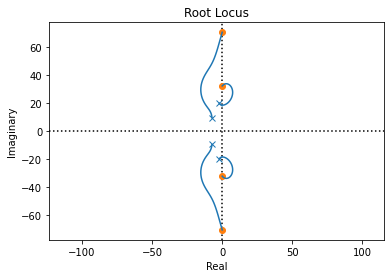

In [40]:
G_ellip = control.tf(*scipy.signal.ellip(N=4, rp=1, rs=40, Wn=20, analog='True'))
control.rlocus(G_ellip, xlim=[-20, 20], grid=False);
plt.axis('equal')

In [41]:
G_ellip

TransferFunction(array([1.00021020e-02, 0.00000000e+00, 6.00788516e+01, 0.00000000e+00,
       5.15127903e+04]), array([1.00000000e+00, 1.87822498e+01, 6.05482165e+02, 6.42935586e+03,
       5.77983014e+04]))

(-350.2142957483162, 324.083036450789, -337.45933754860914, 337.45933754860914)

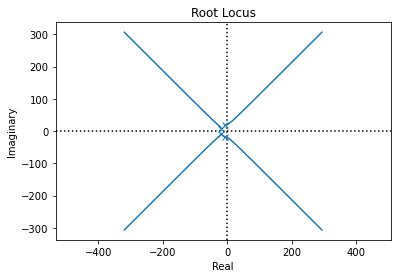

In [42]:
G_butter = control.tf(*scipy.signal.butter(4, 20, analog='True'))
control.rlocus(G_butter, grid=False);
plt.axis('equal')

In [43]:
G_butter

TransferFunction(array([160000.]), array([1.00000000e+00, 5.22625186e+01, 1.36568542e+03, 2.09050074e+04,
       1.60000000e+05]))

# Motor Servo Example

$J \ddot{\theta} + b \dot{\theta} = K i$

$L \dfrac{d}{dt} i + Ri = V - K \dot{\theta}$


Laplace transform:

$J s^2 \Theta + b s \Theta = K I$

$ L sI + RI = V - K s \Theta$

Solve for transfer function:

$ (L s + R)(Js + b)s\Theta = VK - K^2 s \Theta$

$ ((L s + R)(Js + b) + K^2)s\Theta = VK$

$\dfrac{\dot{\Theta}}{V} = \dfrac{K}{(L s + R)(Js + b) + K^2}$


In [44]:
L = 1
R = 1
J = 1
K = 1
b = 1

G = K/((L*s + R)*(J*s + b) + K**2)
G

TransferFunction(array([1]), array([1, 2, 2]))

## Uncontrolled Step Response

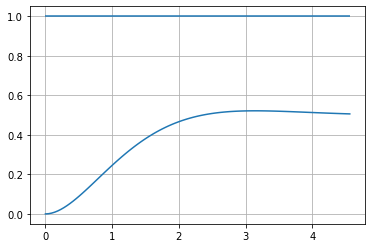

In [46]:
t, y = control.step_response(G);
plt.plot(t, y);
plt.hlines(1, t[0], t[-1])
plt.grid()

## Controlled Step Response

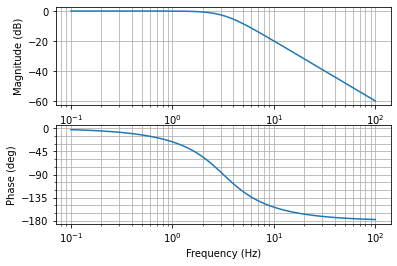

In [47]:
H_noise = control.tf(*scipy.signal.butter(2, 20, analog='True'))
control.bode(H_noise, Hz=True, dB=True);

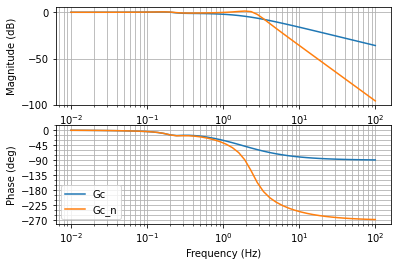

In [88]:
H_controller = 10*(1 + 2/s + 1*s)
#H_noise = control.tf(*scipy.signal.butter(2, 20, analog='True'))
H = H_controller
Gc = G*H/(1 + G*H)
control.bode(Gc, Hz=True, dB=True, label='Gc');
control.bode(Gc_n, Hz=True, dB=True, label='Gc_n');
plt.legend()

In [ ]:
# transfer function with noise supression
Hn = H_controller*H_noise
Gc_n = G*Hn/(1 + G*Hn)

Text(0, 0.5, '$\\dot{\\theta}$')

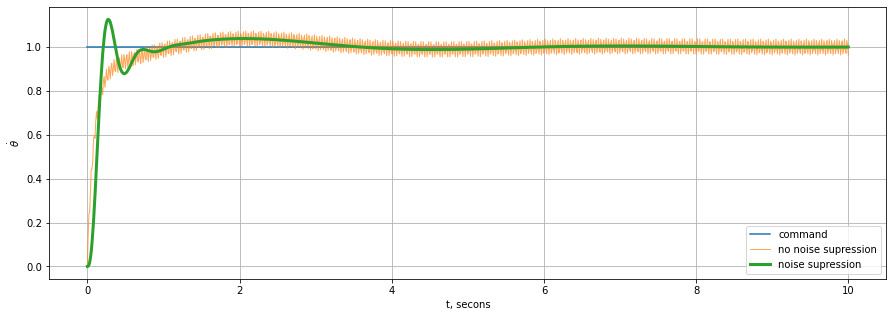

In [77]:


t = np.linspace(0, 10, 1000)
u = np.ones(len(t))
n = np.sin(30*2*np.pi*t)

y = control.forced_response(Gc, T=t, U=u + n)[1]
y_n = control.forced_response(Gc_n, T=t, U=u + n)[1]

plt.figure(figsize=(15, 5))
plt.plot(t, u, label='command');
plt.plot(t, y, label='no noise supression', linewidth=1, alpha=0.7);
plt.plot(t, y_n, label='noise supression', linewidth=3);

#plt.hlines(1, t[0], t[-1])
plt.grid()
plt.legend()
plt.xlabel('t, secons')
plt.ylabel('$\dot{\\theta}$')